
# Feature Selection - Wrapper Methods

This notebook covers various **wrapper methods** for feature selection in Machine Learning.  
We will explore:

1. **What is Wrapper Method?**
2. **Types of Wrapper Methods**
3. **Exhaustive Feature Selection (Best Subset Selection)**
4. **Sequential Forward Selection (SFS)**
5. **Sequential Backward Selection (SBS)**
6. **Advantages and Disadvantages of Wrapper Methods**

---



## 1. What is Wrapper Method?

Wrapper methods are a feature selection technique where we **train models with different feature subsets** and evaluate their performance. These methods rely on a **predictive model** to score feature subsets based on a given evaluation metric (e.g., accuracy, F1-score).

Wrapper methods are computationally expensive but can yield better-selected features.

### Key Idea
- They evaluate feature subsets by actually **training models** on different combinations.
- Typically involve a **search algorithm** to find the best subset.
- More computationally expensive compared to filter methods.

---



## 2. Types of Wrapper Methods

Wrapper methods can be divided into:

1. **Exhaustive Search (Best Subset Selection)**: Tries all possible feature subsets and selects the best. Computationally expensive.  
2. **Sequential Selection Methods**:
   - **Sequential Forward Selection (SFS)**: Starts with no features and adds one at a time.  
   - **Sequential Backward Selection (SBS)**: Starts with all features and removes one at a time.  
   - **Bidirectional Selection**: A hybrid approach that adds and removes features iteratively.  

We will now implement each of these using Python.



## 3. Exhaustive Feature Selection (Best Subset Selection)

This method tests **all possible feature combinations** and selects the one that gives the best model performance. It is **computationally expensive**, making it impractical for datasets with many features.

### Implementation in Python


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the tips dataset
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
# Prepare the data
X = tips.drop('tip', axis=1)
y = tips['tip']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,True,True,False,False,True,True
1,10.34,3,False,True,False,False,True,True
2,21.01,3,False,True,False,False,True,True
3,23.68,2,False,True,False,False,True,True
4,24.59,4,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...
239,29.03,3,False,True,False,True,False,True
240,27.18,2,True,False,False,True,False,True
241,22.67,2,False,False,False,True,False,True
242,17.82,2,False,True,False,True,False,True


In [12]:




# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Exhaustive Feature Selector
efs = EFS(model, 
          min_features=1, 
          max_features=5, 
          scoring='neg_mean_squared_error', 
          cv=5)

# Fit EFS to training data
efs = efs.fit(X_train, y_train)

# Print best feature subset
print("Best features:", efs.best_feature_names_)

# Evaluate the model with selected features
X_train_efs = efs.transform(X_train)
X_test_efs = efs.transform(X_test)

model.fit(X_train_efs, y_train)
y_pred = model.predict(X_test_efs)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Features: 218/218

Best features: ('total_bill', 'smoker_No', 'day_Fri')
Mean Squared Error: 0.6308129505057718



## 4. Sequential Forward Selection (SFS)

SFS starts with **zero features** and **adds one at a time** based on model performance.


In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Initialize SFS with a regression scoring metric
sfs = SFS(model, k_features=5, forward=True, floating=False, scoring='neg_mean_squared_error', cv=5)

# Fit to training data
sfs = sfs.fit(X_train, y_train)

# Selected features
print("Selected features:", sfs.k_feature_names_)

Selected features: ('total_bill', 'sex_Female', 'smoker_No', 'day_Fri', 'time_Dinner')



## 5. Sequential Backward Selection (SBS)

SBS starts with **all features** and **removes one at a time** based on performance.


In [8]:

# Initialize SBS
sbs = SFS(model, k_features=5, forward=False, floating=False, scoring='neg_mean_squared_error', cv=5)

# Fit to training data
sbs = sbs.fit(X_train, y_train)

# Selected features
print("Selected features:", sbs.k_feature_names_)


Selected features: ('total_bill', 'sex_Female', 'smoker_No', 'day_Fri', 'time_Dinner')



## 6. Advantages and Disadvantages of Wrapper Methods

### ✅ Advantages
- More accurate than filter methods as it considers model performance.
- Can find optimal feature subsets for a given model.

### ❌ Disadvantages
- Computationally expensive (especially exhaustive search).
- Prone to overfitting if not cross-validated properly.
- Not scalable for large datasets.



# Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a feature selection technique that recursively removes the least important features based on model performance until a specified number of features remain.

### How RFE Works:
1. Fits a model to the dataset.
2. Ranks features based on importance.
3. Eliminates the least important features and refits the model.
4. Repeats until the desired number of features is selected.

### Advantages:
- Helps reduce overfitting by selecting the most important features.
- Improves model interpretability.

Now, let's implement RFE using the `tips` dataset from Seaborn.

Selected Features: ['size']
Mean Squared Error: 1.118904901911422


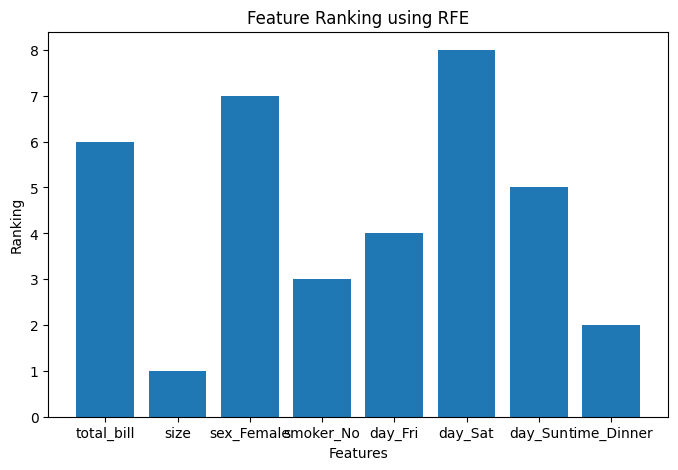

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=1)  # Selecting one best feature
rfe.fit(X_train, y_train)

# Print selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", list(selected_features))

# Model evaluation
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizing feature rankings
plt.figure(figsize=(8, 5))
plt.bar(x=X.columns, height=rfe.ranking_)
plt.xlabel("Features")
plt.ylabel("Ranking")
plt.title("Feature Ranking using RFE")
plt.show()
